# Otto Group Product Classification

### Table of Contents

#### 1. **Information**
    - Reason for Choosing this Dataset ?
    - Source
    - Details
    - Questionnaire
    - Objective

#### 2. **Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Examining Null values

#### 3. **Data Preparation & EDA**
    - Descriptive Statistics
    - Correlation Heatmap
    - Target Class count
    - Target encoding
    - Standardization

#### 5. **Stacking**
    - Splitting Data & Choosing Algorithms
    - Naive Bayes Classifier
    - Decision Tree Classifier
    - SGD Classifier
    - KNN Classifier
    - MLP Classifier
    - Prediction on Validation and test set
    - Meta-Model as Random Forest Classifier
    - Hyper-parameter tuning Random Forest
    - Prediction on Final Test Set

#### 6. **Conclusion**

#### 7. **What's next ?**<br><br>


### Reason for Choosing this Dataset ?

- The Reason behind choosing this model is my Personal Interest to explore various Domains out there.


- However, this Statistical models are not prepared to use for production environment.


### Source :

- https://www.kaggle.com/c/otto-group-product-classification-challenge/data


### Details :

- The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). We are selling millions of products worldwide every day, with several thousand products being added to our product line.


- A consistent analysis of the performance of our products is crucial. However, due to our diverse global infrastructure, many identical products get classified differently. Therefore, the quality of our product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights we can generate about our product range.


- ![alt text](https://storage.googleapis.com/kaggle-competitions/kaggle/4280/media/Grafik.jpg)


- For this competition, we have provided a dataset with 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories. The winning models will be open sourced.


- Evaluation Metrics :

    - Submissions are evaluated using the multi-class logarithmic loss. Each product has been labeled with one true category. For each product, you must submit a set of predicted probabilities (one for every category). The formula is then,
$$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij}),$$
    - where N is the number of products in the test set, M is the number of class labels, \\(log\\) is the natural logarithm, \\(y_{ij}\\) is 1 if observation \\(i\\) is in class \\(j\\) and 0 otherwise, and \\(p_{ij}\\) is the predicted probability that observation \\(i\\) belongs to class \\(j\\).
    - The submitted probabilities for a given product are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with \\(max(min(p,1-10^{-15}),10^{-15})\\).


- Submission Format :
    - You must submit a csv file with the product id, all candidate class names, and a probability for each class. The order of the rows does not matter. The file must have a header and should look like the following:
    - id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9<br>
      1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0<br>
      2,0.0,0.2,0.3,0.3,0.0,0.0,0.1,0.1,0.0,.etc.<br>
      
      
### Questionnaire :

- How is our Target variable distributed ? is it Imbalanced ?

### Objective :

- The goal is to make Stacked predictive model, understanding the intuition behinf it and reviewing some exploratory and modelling techniques.

### Loading Data

In [0]:
#import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the training Dataset

train_df = pd.read_csv('train.csv', header=0)
train_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
#Reading the test Dataset

test_df = pd.read_csv('test.csv', header=0)
test_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,...,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0


In [4]:
#shape of train and test

print ('Training Data set\nExamples :', train_df.shape[0], '\nFeatures :', train_df.shape[1], '\n')
print ('Test Data set\nExamples :', test_df.shape[0], '\nFeatures :', test_df.shape[1])

Training Data set
Examples : 61878 
Features : 95 

Test Data set
Examples : 144368 
Features : 94


- We've 61878 and 144368 examples in Training and Test set.


- While we've 95 features in Training and 94 in test set.

In [5]:
#examining Null values in train set 

train_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [6]:
#examining Null values in test set

test_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

- We've no null values in our Datasets.

### EDA, Preparation and Feature Engineering

- In this section we'll undergo EDA.


- We'll see descriptive statistics initially to understand the spread od individual attributes.


- Also, we'll see Pearson correlation in Later part with the help of Heatmap.

In [7]:
#Descriptive stats

train_df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,...,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,...,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

- One Interesting thing to observe here is all attributes (excluding ID) have minimum value as 0.

In [0]:
#dropping ID from test and train and poppping target set

target = train_df['target']
train_df = train_df.drop(['id', 'target'], axis=1)
test_df = test_df.drop(['id'], axis=1)

- Above we had dropped ID from both Train & Test set while dropping Target from Train set. 

Text(0.5, 1.0, 'Pearson Correlation')

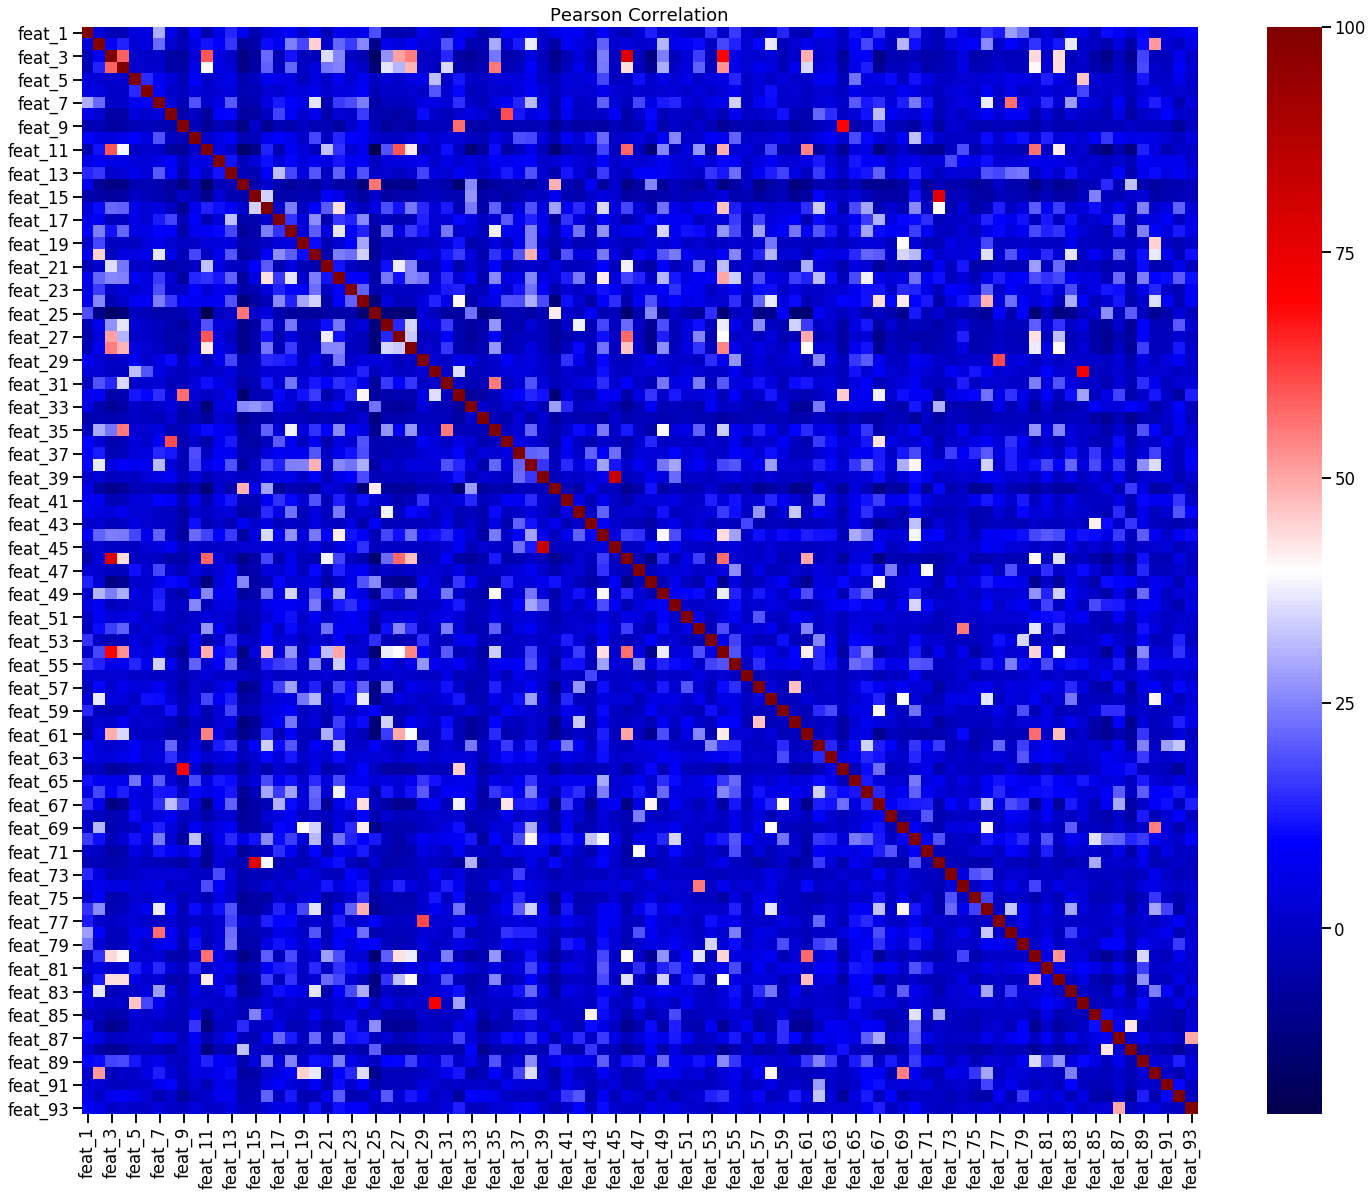

In [9]:
#pearson correlation

sns.set_context('talk')
plt.figure(figsize=(25,20))
sns.heatmap(train_df.corr()*100, cmap='seismic', annot=False)
plt.title('Pearson Correlation')

- With extensively high number of features it is quite difficult to find correlation between features. But we can make out above that "Red" ones are explaining positive relationship or relationship above 0.50 (50%).

Text(0.5, 1.0, 'Target Class Count')

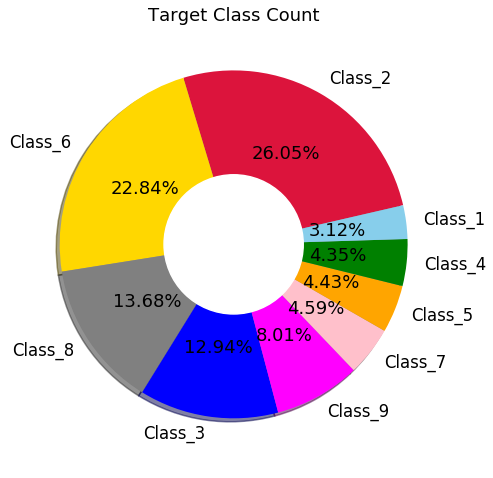

In [10]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(target.value_counts(), labels=target.value_counts().index, autopct='%1.2f%%', explode=[0,0,0,0,0,0,0,0,0], shadow=True, 
        colors=['crimson','gold','grey','blue','magenta','pink','orange','green','skyblue'], startangle=13
       )
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

- Here we can observe that Class 6 and Class 2 are domination ones sharing 22.84% and 26.05% respectively.


- Class 1, Class 4, Class 5 & Class 7 are minorities contributing 3.12%, 4.35%, 4.43% and 4.59%.

In [11]:
#Encoding Target

target = target.str.replace('Class_', '').astype('int')
target.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

- Above we had encoded our target variable into numeric ones.


- Replacing "Class_" isn't enough, we need to also change dtype so we use "astype('int')" function.

In [0]:
#Standardizing data set

from sklearn.preprocessing import StandardScaler

#Standard scaler
scaler = StandardScaler()

#columns
cols = train_df.columns

#transformation on train and test set
norm_train_df = scaler.fit_transform(train_df.values)
norm_test_df = scaler.transform(test_df.values)

#forming new dataframe for standarized set
norm_train_df = pd.DataFrame(data=norm_train_df, columns=cols)
norm_test_df = pd.DataFrame(data=norm_test_df, columns=cols)

- Stadardization of the set is always important as it normalizes the dataset in one scale.


- We've many ways of scaling data ,i.e, Normalization, Z-Score Normalization (Standardization) and MinMax Scaler (Squashing values Between 0 and 1).


- It reduces the computation time upto certain extent.

### Stacking in Action

- Stacking is the combination of multiple models (Base Models / Learners) trained on Training set while making prediction on Validation set and Test set.


- First we'll split Training set in Train + Validation set.


- Then we train model on Training set and Predict / Predict Probabilities on Validation as well as our Test set.


- Our predictions made on validation set become our new features which is our new training set or meta dataset which has our original validation set's target as response variable.


- Further we use a Meta model on Meta data set , we hypertune it if required and predict on test set.


- Below flow diagram gives idealogy behind Stacking 

![alt_text](https://media.geeksforgeeks.org/wp-content/uploads/20190515104518/stacking.png)


- To get best results we always need to hypertune parameters for each model.


- The more the models , more good could be the results.


- As Parameter tuning is too much computational expensive or time consuming if performed on each and every model, I'll prefer to hypertune only Meta-model (We'll see what is meta-model ahead).


- **What are the benefit of Stacking ? (Merits)**

    - Benefit is it increases the accuracy as multiple models are combined together.
    
    - Our meta learner learns from predictions made by our base classifiers.
    
    - In many competitions Stacking is being used to crack the leaderboard.
    

- **Demerits :**

    - Stacking is time-sensitive.
    
    - we cannot use diverse models on time-series problems as different models may produce different outputs. Such outputs cannot be trained by a Meta learner as it is a false practice.


- **Note :** We cannot consider predictions made by highly Under-fitted / Over-fitted base model as a feature for Meta-model.
    
    
- Let us now jump straight into code.

In [14]:
#train - validation split and implementing metrics

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, log_loss, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(norm_train_df, target, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((49502, 93), (12376, 93), (49502,), (12376,))

- Now we've 49502 samples for training set and 12376 for validation.


- Also, after prediction on 12376 samples we'll get 12376 samples for meta training model. 

In [0]:
#defining evaluation metrics

def eval_metrics(estimator, xtrain, ytrain, ytest, prediction, prob_pred):
    plt.figure(figsize=(18,10))  
    print (classification_report(ytest, prediction))
    print ('Cross Validation Score : ', cross_val_score(estimator, xtrain, ytrain, cv=5).mean())
    print ('Log-loss :',log_loss(ytest, prob_pred, normalize=True, eps=1e-15, sample_weight=None))
    sns.heatmap(confusion_matrix(ytest, prediction), cmap='RdBu', annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Observed')

- Above we had defined seld defined function for each model. we'll apply this after training every base learner.


- Our function inherits 5-Fold Cross-Validation to identify over / under-fitting (If any).


- Also, it inherits Log Loss as it is our evaluation metrics

    - **Log-Loss :** -(y * log(pred) + (1 - y) log(1 - pred))

### Naive Bayes Classifier - Classifier 1 / Base Learner 1


- Naive bayes is pretty simple and straight forward classifier which is based on bayes theorem.


![alt_txt](https://miro.medium.com/max/510/1*tjcmj9cDQ-rHXAtxCu5bRQ.png)

              precision    recall  f1-score   support

           1       0.23      0.36      0.28       399
           2       0.66      0.67      0.66      3178
           3       0.44      0.25      0.31      1561
           4       0.24      0.50      0.32       538
           5       0.46      0.96      0.62       565
           6       0.94      0.77      0.85      2884
           7       0.41      0.47      0.44       552
           8       0.89      0.56      0.69      1674
           9       0.61      0.78      0.69      1025

    accuracy                           0.62     12376
   macro avg       0.54      0.59      0.54     12376
weighted avg       0.67      0.62      0.63     12376

Cross Validation Score :  0.6116531081513065
Log-loss : 7.251882557000027
None


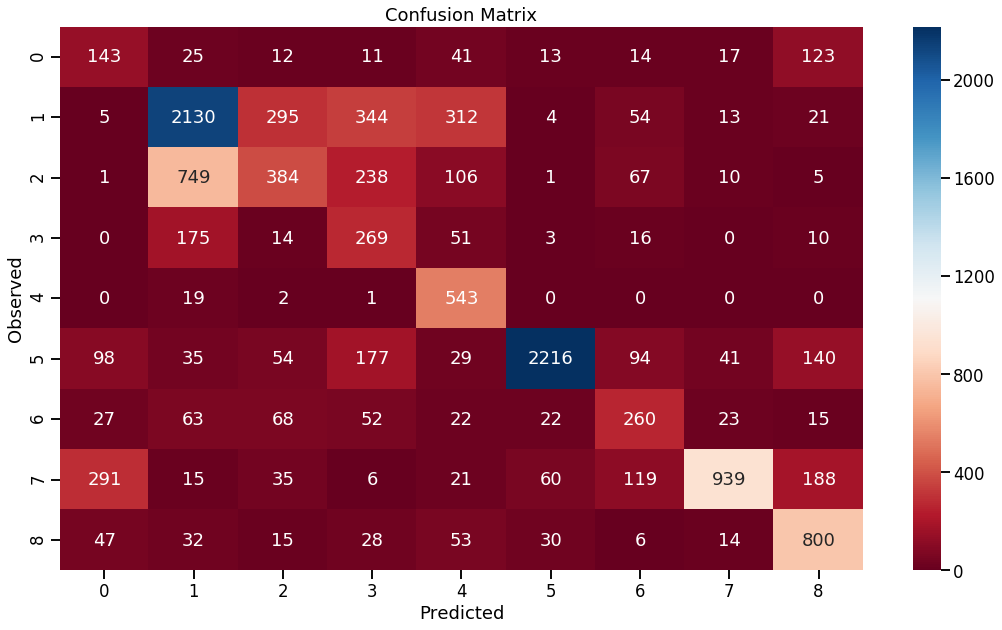

In [50]:
#naive bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(x_train, y_train)

#predict / predict probabilities on validation set
nb_pred = nb.predict(x_test)
nb_prob_pred = nb.predict_proba(x_test)

#Metrics eval
print (eval_metrics(nb, x_train, y_train, y_test, nb_pred, nb_prob_pred))

- Our recall score isn't good for this model.


- Accuracy and cross val. score is approx. close to each other , i.e, 0.62 & 0.61.


- Log-Loss error is 7.25


- In confusion matrix We can observe that Class_2 is being misclassified much, only 384 samples are correctly classified.

### Decision Tree


- Decision tree is fairly complex algorithm based on Information gain and Entropy.

              precision    recall  f1-score   support

           1       0.15      0.53      0.23       399
           2       0.73      0.44      0.55      3178
           3       0.39      0.57      0.46      1561
           4       0.27      0.44      0.33       538
           5       0.95      0.90      0.92       565
           6       0.95      0.71      0.81      2884
           7       0.23      0.56      0.32       552
           8       0.87      0.56      0.68      1674
           9       0.74      0.55      0.63      1025

    accuracy                           0.57     12376
   macro avg       0.59      0.58      0.55     12376
weighted avg       0.71      0.57      0.61     12376

Cross Validation Score :  0.5542016208429821
Log-loss : 2.3911633265937504
None


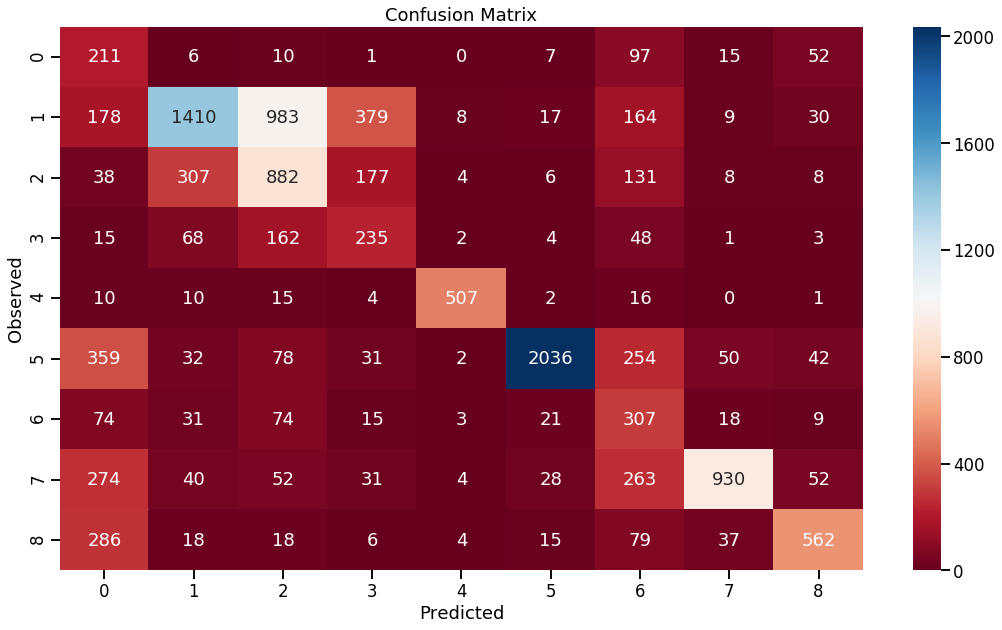

In [51]:
#decision tree implementation

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=16, splitter='random', class_weight='balanced').fit(x_train, y_train)

#predict / predict probabilities on validation set
dt_pred = dt.predict(x_test)
dt_prob_pred = dt.predict_proba(x_test)

#Metrics Evaluation
print (eval_metrics(dt, x_train, y_train, y_test, dt_pred, dt_prob_pred))

- Our accuracy might drop but it don't matter as our recall score is better, meaning our model is classifying well on our data.


- Also, we are not facing over / under-fitting.


- Our Log-loss has decreased significantly to 2.39


- Here Class_2 is classified is better.

### SGD Classifier


- SGD is similar to Gradient Descent, SGD comes into picture if data set is huge.


- For large dataset Gradient descent can be computationally expensive even parameter tuning for the same can be a time consuming task. This is when we implement SGD as it randomly picks sample (Mini-batch) and train it which reduces computation expense and time taken to train is less as well. 

              precision    recall  f1-score   support

           1       0.70      0.27      0.39       399
           2       0.63      0.85      0.73      3178
           3       0.47      0.35      0.40      1561
           4       0.80      0.20      0.33       538
           5       0.96      0.92      0.94       565
           6       0.92      0.93      0.92      2884
           7       0.76      0.52      0.62       552
           8       0.84      0.90      0.87      1674
           9       0.85      0.84      0.84      1025

    accuracy                           0.75     12376
   macro avg       0.77      0.64      0.67     12376
weighted avg       0.75      0.75      0.74     12376

Cross Validation Score :  0.7456871479189561
Log-loss : 0.7232824259749945
None


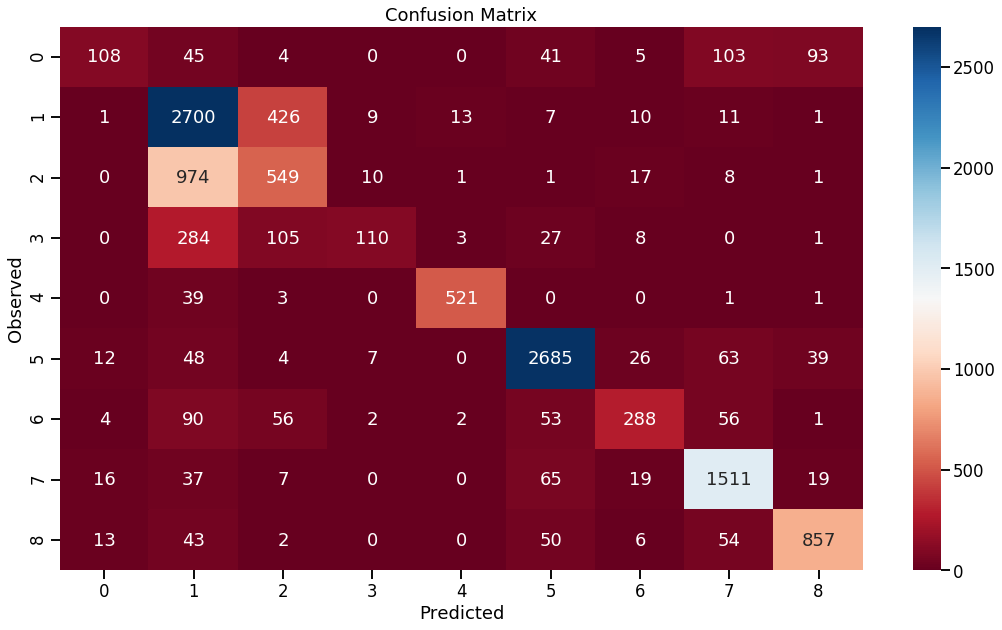

In [52]:
#SGD classifier

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', penalty='elasticnet', n_jobs=-1).fit(x_train, y_train)

#predict / predict probabilities on validation set
sgd_pred = sgd.predict(x_test)
sgd_prob_pred = sgd.predict_proba(x_test)

#Metrics Evaluation
print (eval_metrics(sgd, x_train, y_train, y_test, sgd_pred, sgd_prob_pred))

- Here our accuracy as well as recall scores is good. 


- No over / under-fitting is observed in the above results.


- Also our Log-loss score has decreased to 0.72


- Here Class_3 has misclassified too much , as we can see above.

### KNN


- KNN is a simple algorithm which is based on distance , i.e, Eucidean or Manhattan or Minkowski.


- E.g. : A new instance belongs to a Class_1 if it is closer to other datapoints which are in Class_1 family.

              precision    recall  f1-score   support

           1       0.63      0.51      0.56       399
           2       0.67      0.85      0.75      3178
           3       0.54      0.44      0.49      1561
           4       0.70      0.25      0.37       538
           5       0.96      0.97      0.96       565
           6       0.94      0.92      0.93      2884
           7       0.67      0.55      0.60       552
           8       0.87      0.88      0.88      1674
           9       0.86      0.84      0.85      1025

    accuracy                           0.77     12376
   macro avg       0.76      0.69      0.71     12376
weighted avg       0.77      0.77      0.77     12376

Cross Validation Score :  0.7655854900044038
Log-loss : 1.5870398760733844
None


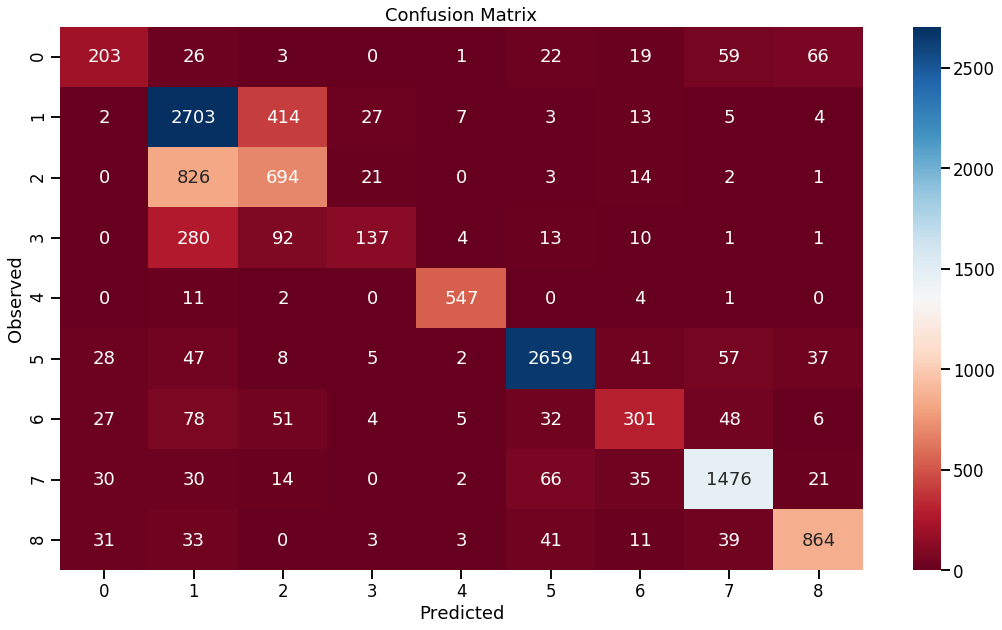

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=9).fit(x_train, y_train)

#predict / predict probabilities on validation set
knn_pred = knn.predict(x_test)
knn_prob_pred = knn.predict_proba(x_test)

#Metrics Evaluation
print (eval_metrics(knn, x_train, y_train, y_test, knn_pred, knn_prob_pred))

- We have got good accuracy here but our log-loss is not so good comparing it will previous model's loss.


- Here Class_2 and Class_3 is misclassified both as evident in Confusion Matrix. 


### MLP


- MLP also known as Artificial Neural Network (ANN), has input layer, hidden layers and output layers.


- It is based on principal of Partial Derivatives which are computed at every iteration to update weights and bias.


- We can also add regularization parameter to decrease the magnitude and reduce over-fitting.

              precision    recall  f1-score   support

           1       0.62      0.53      0.57       399
           2       0.75      0.79      0.77      3178
           3       0.56      0.55      0.56      1561
           4       0.65      0.50      0.57       538
           5       0.96      0.97      0.96       565
           6       0.94      0.94      0.94      2884
           7       0.71      0.68      0.69       552
           8       0.89      0.92      0.90      1674
           9       0.86      0.84      0.85      1025

    accuracy                           0.80     12376
   macro avg       0.77      0.75      0.76     12376
weighted avg       0.80      0.80      0.80     12376

Cross Validation Score :  0.7928772676825766
Log-loss : 0.532360789970726
None


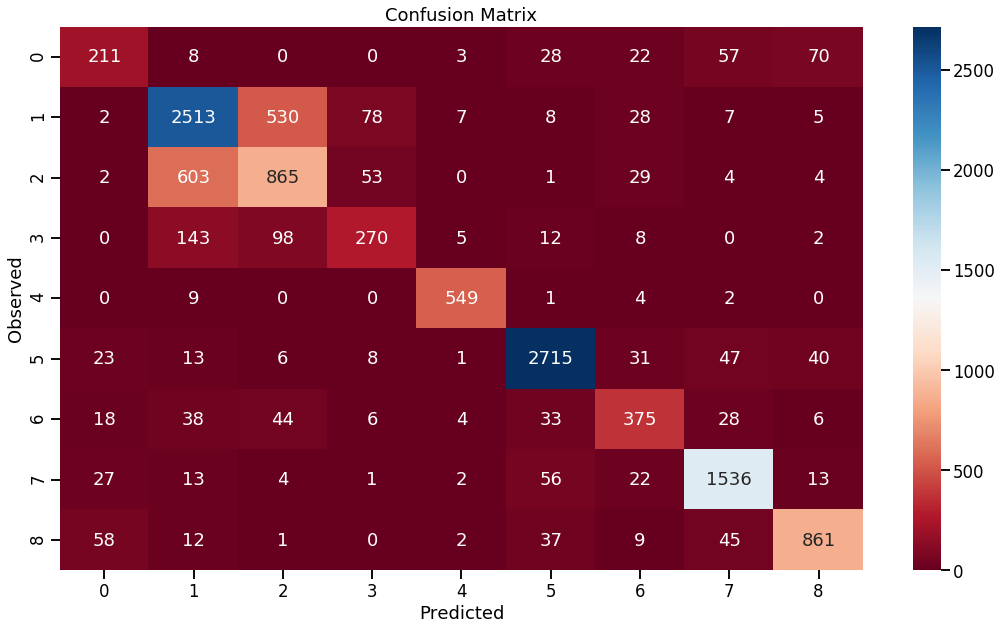

In [54]:
#MLP Classifier

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500, early_stopping=True).fit(x_train, y_train)

#predict / predict probabilities on validation set
mlp_pred = mlp.predict(x_test)
mlp_prob_pred = mlp.predict_proba(x_test)

#Metrics Evaluation
print (eval_metrics(mlp, x_train, y_train, y_test, mlp_pred, mlp_prob_pred))

- We've got good accuracy as well as recall score.


- No under / over-fitting observed.


- Also it is evident that Log-Loss is 0.53 , which has reduced well compared to previous models.


- MLP is performing well , our Class_2 & Class_3 is well classified.

### Forming a traning set for Meta Model

- Now we'll form a dataframe using predictions made by our base learners.


- And our target variable will be y_test , i.e, those 12376 examples in target set.


- We'll also create dataframe by probabilities predicted on our valid set.

In [34]:
#creating DF by predictions

meta_training_set = pd.DataFrame({'Naive_Bayes':nb_pred, 'Decision_tree':dt_pred,
                                  'SGD':sgd_pred, 'KNN':knn_pred, 'MLP':mlp_pred})

meta_training_set.head()

,Naive_Bayes,Decision_tree,SGD,KNN,MLP
0,4,4,2,2,5
1,3,7,7,7,7
2,6,6,6,6,6
3,9,7,4,6,4
4,6,6,6,6,6


In [35]:
#stacked validation probabilities

meta_prob_training_set = np.column_stack((nb_prob_pred, dt_prob_pred, sgd_prob_pred,
                                          knn_prob_pred, mlp_prob_pred))

meta_prob_training_set.shape

(12376, 45)

- Above predictions are probabilities of validation set, we can also use these as training data.

### Prediction on Test set


- Now, we also need to predict on test set so we'll have same number of features for prediction.


- And we'll also predict probabilities for that.

In [45]:
nb_pred_test = nb.predict(test_df)
dt_pred_test = dt.predict(test_df)
sgd_pred_test = sgd.predict(test_df)
knn_pred_test = knn.predict(test_df)
mlp_pred_test = mlp.predict(test_df)

#test dataframe
final_test_set = pd.DataFrame({'Naive_Bayes':nb_pred_test, 'Decision_tree':dt_pred_test,
                               'SGD':sgd_pred_test, 'KNN':knn_pred_test, 'MLP':mlp_pred_test})
final_test_set.head()

,Naive_Bayes,Decision_tree,SGD,KNN,MLP
0,7,3,3,3,4
1,6,3,6,8,8
2,6,2,6,6,6
3,2,2,2,2,2
4,1,9,8,8,8


In [0]:
#probabilities
nb_prob_pred_test = nb.predict_proba(test_df)
dt_prob_pred_test = dt.predict_proba(test_df)
sgd_prob_pred_test = sgd.predict_proba(test_df)
knn_prob_pred_test = knn.predict_proba(test_df)
mlp_prob_pred_test = mlp.predict_proba(test_df)

#stacked probabilities for test set
final_prob_test_set = np.column_stack((nb_prob_pred_test, dt_prob_pred_test, sgd_prob_pred_test,
                                       knn_prob_pred_test, mlp_prob_pred_test))

### Random Forest as Meta-Model

- We'll use Random Forest as our Meta model and since we've less number of features we'll also parameter tune the same.


- Random forest is a combination of decision tress. In case of Classification It is based on voting system, the more the votes, the instance will beong to that class.

In [40]:
#Random forest 

#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#lr = LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1, max_iter=300).fit(meta_training_set.values, y_test.values)

mm_rf = RandomForestClassifier(class_weight='balanced_subsample', min_samples_split=25, n_estimators=50).fit(meta_training_set.values, y_test.values)

#Metrics eval
print ('Meta-Model Training Score :',mm_rf.score(meta_training_set.values, y_test.values))
print ('Meta-Model Cross Validation Score :', cross_val_score(mm_rf, meta_training_set.values, y_test.values, cv=5).mean())

Meta-Model Training Score : 0.7975921137685844
Meta-Model Cross Validation Score : 0.7798099952229808


- As to approach in a simplest way we are going with few parameters mentioned in the code.


- With such approach we are able to achieve good score, i.e, 0.79 is our training score and 0.77 is cross-val. 

In [41]:
#Random forest hyperparameter tuning

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50,150,100], 'max_depth':[5,6,7,8,9], 'criterion':['entropy','gini'], 'min_samples_split':[30,50]}

grid_meta_model = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), 
                               param_grid=params, refit=['accuracy', 'neg_log_loss'], cv=5)

grid_meta_model.fit(meta_training_set.values, y_test.values)

#Metrics eval
print ('Best Parameters :', grid_meta_model.best_params_)
print ('Meta-Model Training Score :',grid_meta_model.score(meta_training_set.values, y_test.values))

Best Parameters : {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 30, 'n_estimators': 100}
Meta-Model Training Score : 0.811005171299289


- We have achieved Training score of 0.81 with parameter tuning having best parameters as 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 30, 'n_estimators': 100

Text(0.5, 1.0, 'Mean Test Score Throughout Iterations')

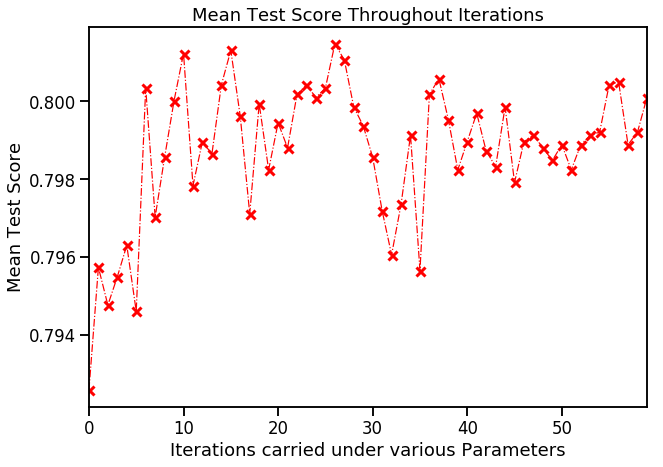

In [43]:
#Performance plot across various parameters

pd.DataFrame(grid_meta_model.cv_results_)['mean_test_score'].plot(linestyle='-.', marker='x', figsize=(10,7), color='r', markeredgewidth=3, linewidth=1.2)
plt.xlabel('Iterations carried under various Parameters')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score Throughout Iterations')

- We can observe that total of 60 Iterations were carried across various parameters.


- At 11th, 16th and 25th Iteration we got cloe to 0.80 Score.

In [0]:
#Prediction on final set

pred_final_test = grid_meta_model.predict(final_test_set)
pred_final_prob_test = grid_meta_model.predict_proba(final_test_set)

In [47]:
#predicting on final test set

test_id = pd.read_csv('test.csv', header=0)['id']

#final CSV
final_csv = pd.DataFrame(data=np.column_stack((test_id.values, pred_final_test)), 
                         columns=['id','target'])

#replacing int to str
final_csv['target'].replace([1,2,3,4,5,6,7,8,9], 
                            ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'], inplace=True)

final_csv.set_index('id', inplace=True)
final_csv.to_csv('final_test_pred.csv') #to csv
final_csv.head(5)

,target
id,
1,Class_4
2,Class_8
3,Class_6
4,Class_2
5,Class_8


In [48]:
#predicting probabilities on final test set

#final prob csv
final_prob_csv = pd.DataFrame(data=np.column_stack((test_id.values, pred_final_prob_test)), 
                         columns=['id','Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])

#replacing str ID to int
final_prob_csv['id'] = final_prob_csv['id'].astype('int')
final_prob_csv.set_index('id', inplace=True)
final_prob_csv.to_csv('final_pred_prob.csv') #write to csv
final_prob_csv.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.001053,0.140055,0.318423,0.501655,0.005512,0.004791,0.024550,0.001733,0.002229
2,0.047056,0.023903,0.007200,0.003333,0.002836,0.109548,0.093618,0.657339,0.055167
3,0.008609,0.009697,0.000000,0.010050,0.000000,0.869900,0.018910,0.038862,0.043973
4,0.001499,0.848388,0.106922,0.031997,0.001581,0.002192,0.004742,0.001339,0.001340
5,0.055667,0.001618,0.000205,0.000000,0.000000,0.006581,0.011344,0.757255,0.167330


- Now we have 2 types of predictions in-hand, one is Classified and other is a prediction of Probablities. 


- Since, we need to submit file which has predictions as probabilities we will go by sumitting **final_prob_csv**


- With that we conclude our Stacking session.

### Conclusion :

- We were able to improve our performace by stacking.


- Parameter tuned Meta model gives good score as a post to beginner Meta model.


### What's next :

- Next we can improve by tuning parameters for base models or try various algorithms like Extra-tree classifiers , Gradient Boosting or XGB Classifiers. 


- Or we can increase numbr of base models.


- Other thing we can try is PCA , since we have large number of features.